> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

in this project i will work in tmdb-movies data set , first becuse i love movies, seconds becous i can relat alot of information out of about revenou, budget, production companies .. etc.

In [5]:
import pandas as pd
import seaborn as sb
import os
import numpy as np
import pprint 
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors
import warnings
from collections import Counter
import datetime
import wordcloud
import json
import itertools
import nltk
import csv
import seaborn as sns 
import re


%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [6]:
# read the data file
#tmdb-movies.csv
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv',encoding = 'latin-1')

In [8]:
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃÂ¡lez IÃÂ±ÃÂ¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,

In [7]:
# to show columns 
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
# to show datatypes 
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


### Data Cleaning (Replace this with more specific notes!)

In [9]:
# to show duplicated 
sum(df.duplicated())

1

In [14]:
# to drop duplicate
df.drop_duplicates(inplace=True)

In [15]:
# to checked duplicated 
sum(df.duplicated())

0

In [16]:
#change release_date from object to datetime
df.release_date = pd.to_datetime(df['release_date'])
df.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [17]:
# drop unnecessary columns
df.drop(['tagline', 'imdb_id','homepage','tagline','keywords'], inplace=True, axis=1, errors='ignore')

In [18]:
# check the columns after drop unnecessary 
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [19]:
#change the columns revenue and budget to int so we can do calaculation if we need 
df['revenue']=df['revenue'].apply(np.int64)
df['budget'] = df['budget'].apply(np.int64)

In [20]:
# to check data type of revenue,budget
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(6)
memory usage: 1.5+ MB


In [21]:
# replace all zero to Nan
df['runtime'] = df['runtime'].replace(0,np.nan)

In [22]:
# to drop rows with all zeros
list=['budget', 'revenue']
df.dropna(subset = list, inplace = True)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (what are the highest 5 movies in revenue ?)
### Research Question 2 (what are the lowest 5 movies in revenue?)
### Research Question 3 (what are the top 5 highest in revenue movies  production companies?)
### Research Question 4 (which yaer that has the highest budget ?)



In [24]:
#the highest 5 movies in revenue .
top_profit=df.sort_values(by='revenue',ascending=False).head()
a=top_profit[['original_title','revenue']]
a

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810


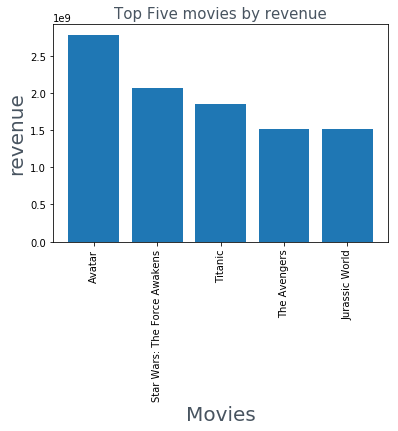

In [25]:
#Visulaization for Q1
x=range(len(a['original_title']))
y=a['revenue']
plt.bar(x,y,align='center')
plt.title('Top Five movies by revenue',fontsize=15,color='#485460')        
plt.xticks(np.arange(len(a['original_title'])),a['original_title'],rotation=90)
plt.xlabel('Movies',fontsize=20,color='#485460')
plt.ylabel('revenue',fontsize=20,color='#485460')
plt.show()

In [42]:
#the highest 5 movies in budget.
thevote_average=df.sort_values(by='budget',ascending=False).head()
e=thevote_average[['original_title','budget']]
e

,original_title,budget
2244,The Warrior's Way,425000000
3375,Pirates of the Caribbean: On Stranger Tides,380000000
7387,Pirates of the Caribbean: At World's End,300000000
14,Avengers: Age of Ultron,280000000
6570,Superman Returns,270000000


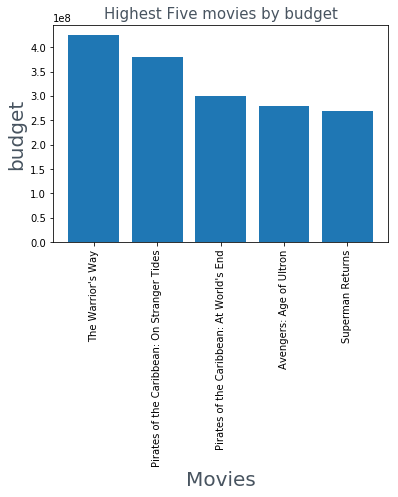

In [43]:
#Visulaization for Q2
x=range(len(e['original_title']))
y=e['budget']
plt.bar(x,y,align='center')
plt.title('Highest Five movies by budget',fontsize=15,color='#485460')        
plt.xticks(np.arange(len(e['original_title'])),e['original_title'],rotation=90)
plt.xlabel('Movies',fontsize=20,color='#485460')
plt.ylabel('budget',fontsize=20,color='#485460')
plt.show()

In [28]:
#the top 5 highest in revenue movies with director.
top_profit_d=df.sort_values(by='revenue',ascending=False).head()
d=top_profit[['director','revenue']]
d

,director,revenue
1386,James Cameron,2781505847
3,J.J. Abrams,2068178225
5231,James Cameron,1845034188
4361,Joss Whedon,1519557910
0,Colin Trevorrow,1513528810


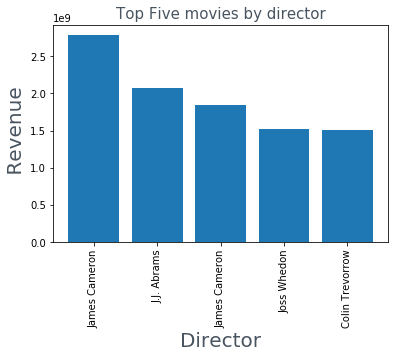

In [33]:
#Visulaization for Q3
x=range(len(d['director']))
y=d['revenue']
plt.bar(x,y,align='center')
plt.title('Top Five movies by director',fontsize=15,color='#485460')        
plt.xticks(np.arange(len(d['director'])),d['director'],rotation=90)
plt.xlabel('Director',fontsize=20,color='#485460')
plt.ylabel(' Revenue',fontsize=20,color='#485460')
plt.show()

In [34]:
#here defin the yaer that has the highest budget.
top_profit=df.sort_values(by='budget',ascending=False).head()
C=top_profit[['release_year','budget']]
C

,release_year,budget
2244,2010,425000000
3375,2011,380000000
7387,2007,300000000
14,2015,280000000
6570,2006,270000000


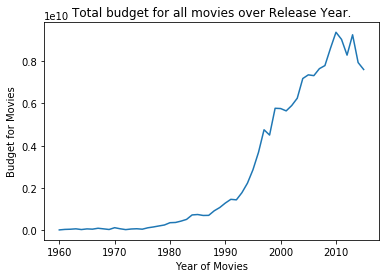

In [35]:
#which yaer that has the highest budget Q4
year1 = df.groupby('release_year')['budget'].sum()
plt.xlabel('Year of Movies')
plt.ylabel('Budget for Movies')
plt.title('Total budget for all movies over Release Year.')
plt.plot(year1)
plt.show()

<a id='conclusions'></a>
## Conclusions


In this project i tray to show some business usual need like revenue and budget,
-what are the highest 5 movies in revenue ? we can see that oficely Avatar have the highest revenu ever from our data set.
-what are the highest 5 movies in budget? its The Warrior's Way, with 425000000 milion. 
-what are the top  highest in revenue movies dairctor? we esaly can say that, the highest dirctoer revenu gos to James Cameron the director of Avatar as we see befor.
- which yaer that has the highest budget? its 2010 the year The Warrior's Way whech have the highest budget.
in this way we can see the result as text or charts.
One of the chalenges i faced is how to make the jupyter to read my data, and  also how i can put the production companies (Q2) in good way with out affect the understanding of it.



In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0